<a href="https://colab.research.google.com/github/chrisporras/xgdiss/blob/main/Audrey's_Copy_of_XGDFinal2023_tiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project 2023
Machine Learning for Biomedical Data Science

Team Xtreme Gradient Dissenters

Members: Audrey Lee, Christian Porras, Joy Jiang

April 24, 2023

From: https://www.kaggle.com/code/nickuzmenkov/strip-ai-eda-data-preparation


Look @ https://huggingface.co/blog/fine-tune-vit

https://www.kaggle.com/code/rftexas/better-image-tiles-removing-white-spaces

## Data Download

In [1]:
from google.colab import drive
drive.mount('/content/drive')

save_models_dir = "/content/drive/MyDrive/XGD Final Convolution/"

Mounted at /content/drive


In [2]:
!git clone https://github.com/chrisporras/xgdiss.git

Cloning into 'xgdiss'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), 1.19 MiB | 2.52 MiB/s, done.


In [3]:
# install Kaggle public api
! pip install -q kaggle
# Choose the kaggle.json file that you downloaded
! mkdir ~/.kaggle
! cp ./xgdiss/kaggle.json ~/.kaggle/
# Make directory named kaggle and copy kaggle.json file there.
!chmod 600 ~/.kaggle/kaggle.json
#Change the permissions of the file.
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25           9283        335  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           2676         69  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           4305         98  1.0              
evangower/premier-league-2022-2023                             Pr

In [4]:
!kaggle datasets download -d nickuzmenkov/strip-ai-256x256-png-tiles

100% 2.03G/2.03G [00:19<00:00, 194MB/s]
100% 2.03G/2.03G [00:19<00:00, 114MB/s]


In [5]:
!unzip -qq strip-ai-256x256-png-tiles.zip

## Data Exploration

In [6]:
import numpy as np
import pandas as pd 
# import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:
orig_train_df = pd.read_csv('train.csv')
orig_train_df

,image_id,center_id,patient_id,image_num,label,filename
0,006388_0,11,006388,0,CE,006388_0-0000.png
1,006388_0,11,006388,0,CE,006388_0-0001.png
2,006388_0,11,006388,0,CE,006388_0-0002.png
3,006388_0,11,006388,0,CE,006388_0-0003.png
4,006388_0,11,006388,0,CE,006388_0-0004.png
...,...,...,...,...,...,...
16564,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png
16565,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png
16566,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png
16567,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png


In [8]:
labels_num = {"CE":0, "LAA":1}
orig_train_df['label_num'] = orig_train_df['label'].map(labels_num)

In [9]:
orig_train_df["file_path"] = orig_train_df["filename"].apply(lambda x: "./train/" + x)
# orig_train_df

In [10]:
# def compute_statistics(image):
#     """
#     Args:
#         image                  numpy.array   multi-dimensional array of the form WxHxC
    
#     Returns:
#         ratio_white_pixels     float         ratio of white pixels over total pixels in the image 
#     """
#     width, height = image.shape[0], image.shape[1]
#     num_pixels = width * height
    
#     num_white_pixels = 0
    
#     summed_matrix = np.sum(image, axis=-1)
#     # Note: A 3-channel white pixel has RGB (255, 255, 255)
#     num_white_pixels = np.count_nonzero(summed_matrix > 620)
#     ratio_white_pixels = num_white_pixels / num_pixels
    
#     # green_concentration = np.mean(image[1])
#     # blue_concentration = np.mean(image[2])
    
#     # return ratio_white_pixels, green_concentration, blue_concentration
#     return ratio_white_pixels

In [11]:
# from skimage.io import imread

# orig_train_df["ratio_white_pixels"] = orig_train_df["file_path"].apply(lambda x: compute_statistics(imread(x)))

Another method to find amount of tissue coverage of slide:

In [12]:
from skimage.filters import threshold_mean, threshold_otsu
from skimage.color import rgb2gray, rgb2hsv
from skimage.io import imread

def tile_coverage(file_path):
  # img = image
  # img = rgb2gray(image)
  img = imread(file_path)
  hsv_img = rgb2hsv(img)
  sat_img = hsv_img[:, :, 1]
  sat_threshold = 0.5
  binary = sat_img > sat_threshold

  # img = imread(file_path, as_gray=True)
  # thresh = threshold_otsu(img)
  # binary = img > thresh
  # binary = binary.transpose((1, 2, 0))
  # plt.imshow(binary, cmap=plt.cm.gray)

  pct_coverage = (np.count_nonzero(binary)) / binary.size
  # print(pct_coverage)
  return pct_coverage


In [13]:
# from skimage.filters import try_all_threshold

# test_img = imread("./train/e5f672_0-0042.png")

# hsv_img = rgb2hsv(test_img)
# hue_img = hsv_img[:, :, 0]
# value_img = hsv_img[:, :, 2]
# sat_img = hsv_img[:, :, 1]

# plt.imshow(value_img)
# # print(test_img)
# # thresh = threshold_otsu(test_img)
# # binary = test_img > thresh
# # plt.imshow(binary, cmap=plt.cm.gray)
# # fig, ax = try_all_threshold(test_img, verbose=False)

# # print(compute_statistics(binary))
# # print(binary)
# # pd.DataFrame(sat_img).describe()
# pd.DataFrame(value_img).describe()

In [14]:
# test_img = imread("./train/4c284f_0-0024.png")
# hsv_img = rgb2hsv(test_img)
# hue_img = hsv_img[:, :, 0]
# value_img = hsv_img[:, :, 2]
# sat_img = hsv_img[:, :, 1]

# # plt.imshow(sat_img, cmap="hsv")

# sat_threshold = 0.5
# binary_img = sat_img > sat_threshold

# plt.imshow(binary_img)
# # print(hue_img)
# # plt.imshow(test_img)
# # print(test_img)
# # thresh = threshold_otsu(test_img)
# # binary = test_img > thresh
# # plt.imshow(binary, cmap=plt.cm.gray)
# # fig, ax = try_all_threshold(test_img, verbose=False)
# # # print(compute_statistics(binary))
# # print(binary)
# # pct_coverage = (binary.size - np.count_nonzero(binary)) / binary.size
# # print(pct_coverage)

# pd.DataFrame(value_img).describe()


In [15]:
# test_img = imread("./train/ffec5c_1-0043.png")
# hsv_img = rgb2hsv(test_img)
# hue_img = hsv_img[:, :, 0]
# value_img = hsv_img[:, :, 2]
# sat_img = hsv_img[:, :, 1]

# # plt.imshow(sat_img, cmap="hsv")
# sat_threshold = 0.5
# binary_img = sat_img > sat_threshold
# plt.imshow(binary_img, cmap="gray")
# # print(hue_img)
# # plt.imshow(test_img)
# # # print(test_img)
# # thresh = threshold_otsu(test_img)
# # binary = test_img > thresh
# # plt.imshow(binary, cmap=plt.cm.gray)
# # fig, ax = try_all_threshold(test_img, verbose=False)
# # # print(compute_statistics(binary))
# # print(binary)
# pd.DataFrame(sat_img).describe()
# pct_coverage = (np.count_nonzero(binary_img)) / binary_img.size
# print(pct_coverage)

In [16]:

# test_img = imread("./train/6baf51_0-0006.png")
# hsv_img = rgb2hsv(test_img)
# hue_img = hsv_img[:, :, 0]
# value_img = hsv_img[:, :, 2]
# sat_img = hsv_img[:, :, 1]

# # plt.imshow(sat_img, cmap="hsv")

# sat_threshold = 0.5
# binary_img = sat_img > sat_threshold
# print(binary_img)

# plt.imshow(binary_img,cmap="gray")

In [17]:
# from skimage.color import combine_stains
# test_img = imread("./train/0fcfe9_0-0021.png")
# hsv_img = rgb2hsv(test_img)
# hue_img = hsv_img[:, :, 0]
# value_img = hsv_img[:, :, 2]
# sat_img = hsv_img[:, :, 1]

# # plt.imshow(sat_img, cmap="hsv")

# sat_threshold = 0.4
# binary_img = sat_img > sat_threshold
# print(binary_img)

# plt.imshow(binary_img,cmap="gray")
# pct_coverage = (np.count_nonzero(binary_img)) / binary_img.size
# print(pct_coverage)

In [18]:
orig_train_df["ratio_coverage"] = orig_train_df["file_path"].apply(lambda x: tile_coverage(x))
orig_train_df

,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path,ratio_coverage
0,006388_0,11,006388,0,CE,006388_0-0000.png,0,./train/006388_0-0000.png,0.030243
1,006388_0,11,006388,0,CE,006388_0-0001.png,0,./train/006388_0-0001.png,0.375031
2,006388_0,11,006388,0,CE,006388_0-0002.png,0,./train/006388_0-0002.png,0.113083
3,006388_0,11,006388,0,CE,006388_0-0003.png,0,./train/006388_0-0003.png,0.312225
4,006388_0,11,006388,0,CE,006388_0-0004.png,0,./train/006388_0-0004.png,0.104553
...,...,...,...,...,...,...,...,...,...
16564,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png,1,./train/ffec5c_1-0006.png,0.242996
16565,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png,1,./train/ffec5c_1-0007.png,0.241653
16566,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png,1,./train/ffec5c_1-0042.png,0.151810
16567,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png,1,./train/ffec5c_1-0043.png,0.344254


In [19]:
train_df = orig_train_df.sort_values(["ratio_coverage"], ascending=False)
# train_df = orig_train_df.sort_values(["image_id", "ratio_coverage"], ascending=False).groupby("image_id").head(16).reset_index(drop=True)
train_df

,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path,ratio_coverage
174,028989_0,5,028989,0,LAA,028989_0-0117.png,1,./train/028989_0-0117.png,0.953156
16348,fd684f_0,11,fd684f,0,LAA,fd684f_0-0118.png,1,./train/fd684f_0-0118.png,0.930222
2034,1f9d4f_0,10,1f9d4f,0,CE,1f9d4f_0-0153.png,0,./train/1f9d4f_0-0153.png,0.921890
9916,99c5c8_0,1,99c5c8,0,CE,99c5c8_0-0124.png,0,./train/99c5c8_0-0124.png,0.919525
7327,6baf51_1,11,6baf51,1,LAA,6baf51_1-0020.png,1,./train/6baf51_1-0020.png,0.916382
...,...,...,...,...,...,...,...,...,...
7217,6baf51_0,11,6baf51,0,LAA,6baf51_0-0174.png,1,./train/6baf51_0-0174.png,0.000000
15006,ec3098_0,6,ec3098,0,CE,ec3098_0-0018.png,0,./train/ec3098_0-0018.png,0.000000
7216,6baf51_0,11,6baf51,0,LAA,6baf51_0-0173.png,1,./train/6baf51_0-0173.png,0.000000
7215,6baf51_0,11,6baf51,0,LAA,6baf51_0-0172.png,1,./train/6baf51_0-0172.png,0.000000


In [20]:
orig_train_df["ratio_coverage"].describe()

count    16569.000000
mean         0.158066
std          0.165221
min          0.000000
25%          0.031433
50%          0.101059
75%          0.232880
max          0.953156
Name: ratio_coverage, dtype: float64

In [21]:
# train_df = orig_train_df[(orig_train_df["ratio_coverage"] < 1) & 
#                          (orig_train_df["ratio_coverage"] > 0.5)]
train_df = orig_train_df[orig_train_df["ratio_coverage"] > 0.1]
train_df = train_df.reset_index(drop=True)
train_df

,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path,ratio_coverage
0,006388_0,11,006388,0,CE,006388_0-0001.png,0,./train/006388_0-0001.png,0.375031
1,006388_0,11,006388,0,CE,006388_0-0002.png,0,./train/006388_0-0002.png,0.113083
2,006388_0,11,006388,0,CE,006388_0-0003.png,0,./train/006388_0-0003.png,0.312225
3,006388_0,11,006388,0,CE,006388_0-0004.png,0,./train/006388_0-0004.png,0.104553
4,006388_0,11,006388,0,CE,006388_0-0005.png,0,./train/006388_0-0005.png,0.585846
...,...,...,...,...,...,...,...,...,...
8337,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png,1,./train/ffec5c_1-0006.png,0.242996
8338,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png,1,./train/ffec5c_1-0007.png,0.241653
8339,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png,1,./train/ffec5c_1-0042.png,0.151810
8340,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png,1,./train/ffec5c_1-0043.png,0.344254


For each image_id tile, take the darkest 16 tiles (non-whitespace)

In [22]:
# train_df = orig_train_df.sort_values(["image_id", "ratio_white_pixels"], ascending=True).groupby("image_id").head(16).reset_index(drop=True)
# train_df

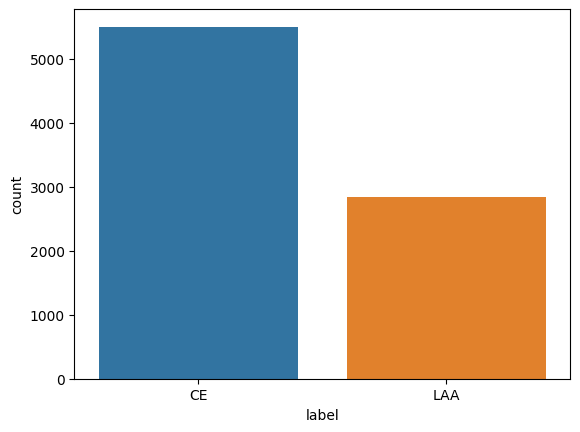

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the different classes
fig, ax = plt.subplots()
ax = sns.countplot(data=train_df,
                   x="label")

In [24]:
# For more ease getting word labels from numerical predictions later
num_labels = {v:k for k,v in labels_num.items()}
num_labels

{0: 'CE', 1: 'LAA'}

## Stratified Group K Fold to split into train/val/test

We use group stratified k fold splitting to create 64%-16%-20% training-validation-testing splits to ensure relatively equal class distribution while safeguarding against data leakage.

In [25]:
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold

# Changed from n_splits=5 to 10
gskf = StratifiedGroupKFold(n_splits=10, shuffle = True, random_state = 42)
# split(X,y,groups)
splitter = gskf.split(train_df['image_id'], train_df['label_num'], groups=train_df['patient_id'])

for fold,(trainval_idx, test_idx) in enumerate(splitter):
  trainval = train_df.loc[trainval_idx]
  test = train_df.loc[test_idx]
  train_label_count = trainval['label'].value_counts()
  testval_label_count = test['label'].value_counts()
  # break

In [26]:
trainval = trainval.reset_index()
test = test.reset_index()
test.to_csv('test_tiles.csv')

In [27]:
gskf = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 42)
splitter = gskf.split(trainval['image_id'], trainval['label'], groups=trainval['patient_id'])
for fold,(train_idx, val_idx) in enumerate(splitter):
  train = trainval.loc[train_idx]
  val = trainval.loc[val_idx]
  train_label_count = train['label'].value_counts()
  val_label_count = val['label'].value_counts()
  break

# del train['level_0']
# del val['level_0']
train = train.reset_index()
val = val.reset_index()

train=train.drop(columns=["level_0"])
val=val.drop(columns=["level_0"])

# print(train)
# print(val)

train.to_csv('train_tiles.csv')
val.to_csv('val_tiles.csv')

In [28]:
train

,index,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path,ratio_coverage
0,0,006388_0,11,006388,0,CE,006388_0-0001.png,0,./train/006388_0-0001.png,0.375031
1,1,006388_0,11,006388,0,CE,006388_0-0002.png,0,./train/006388_0-0002.png,0.113083
2,2,006388_0,11,006388,0,CE,006388_0-0003.png,0,./train/006388_0-0003.png,0.312225
3,3,006388_0,11,006388,0,CE,006388_0-0004.png,0,./train/006388_0-0004.png,0.104553
4,4,006388_0,11,006388,0,CE,006388_0-0005.png,0,./train/006388_0-0005.png,0.585846
...,...,...,...,...,...,...,...,...,...,...
5763,8337,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png,1,./train/ffec5c_1-0006.png,0.242996
5764,8338,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png,1,./train/ffec5c_1-0007.png,0.241653
5765,8339,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png,1,./train/ffec5c_1-0042.png,0.151810
5766,8340,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png,1,./train/ffec5c_1-0043.png,0.344254


In [29]:
val

,index,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path,ratio_coverage
0,53,008e5c_0,11,008e5c,0,CE,008e5c_0-0000.png,0,./train/008e5c_0-0000.png,0.185211
1,54,008e5c_0,11,008e5c,0,CE,008e5c_0-0005.png,0,./train/008e5c_0-0005.png,0.116165
2,55,008e5c_0,11,008e5c,0,CE,008e5c_0-0006.png,0,./train/008e5c_0-0006.png,0.221619
3,203,03d1ec_0,11,03d1ec,0,LAA,03d1ec_0-0001.png,1,./train/03d1ec_0-0001.png,0.115372
4,204,03d1ec_0,11,03d1ec,0,LAA,03d1ec_0-0004.png,1,./train/03d1ec_0-0004.png,0.134491
...,...,...,...,...,...,...,...,...,...,...
1679,8161,fd368e_0,10,fd368e,0,LAA,fd368e_0-0036.png,1,./train/fd368e_0-0036.png,0.341080
1680,8162,fd368e_0,10,fd368e,0,LAA,fd368e_0-0037.png,1,./train/fd368e_0-0037.png,0.224289
1681,8163,fd368e_0,10,fd368e,0,LAA,fd368e_0-0038.png,1,./train/fd368e_0-0038.png,0.160370
1682,8164,fd368e_0,10,fd368e,0,LAA,fd368e_0-0042.png,1,./train/fd368e_0-0042.png,0.619156


In [30]:
test

,index,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path,ratio_coverage
0,263,0468a8_0,11,0468a8,0,CE,0468a8_0-0000.png,0,./train/0468a8_0-0000.png,0.303986
1,264,0468a8_0,11,0468a8,0,CE,0468a8_0-0002.png,0,./train/0468a8_0-0002.png,0.362427
2,265,0468a8_0,11,0468a8,0,CE,0468a8_0-0003.png,0,./train/0468a8_0-0003.png,0.115311
3,266,0468a8_0,11,0468a8,0,CE,0468a8_0-0004.png,0,./train/0468a8_0-0004.png,0.535446
4,267,0468a8_0,11,0468a8,0,CE,0468a8_0-0005.png,0,./train/0468a8_0-0005.png,0.105972
...,...,...,...,...,...,...,...,...,...,...
885,8268,fdf998_1,4,fdf998,1,CE,fdf998_1-0016.png,0,./train/fdf998_1-0016.png,0.266479
886,8269,fdf998_1,4,fdf998,1,CE,fdf998_1-0017.png,0,./train/fdf998_1-0017.png,0.776337
887,8270,fdf998_1,4,fdf998,1,CE,fdf998_1-0020.png,0,./train/fdf998_1-0020.png,0.169266
888,8271,fdf998_1,4,fdf998,1,CE,fdf998_1-0022.png,0,./train/fdf998_1-0022.png,0.203629


As QC, I want to make sure the image ID are different between the train, val, and test classes

In [31]:
train_img_ids = train.image_id.unique()
val_img_ids = val.image_id.unique()
test_img_ids = test.image_id.unique()

print(bool(set(train_img_ids) & set(val_img_ids)))
print(bool(set(train_img_ids) & set(test_img_ids)))
print(bool(set(test_img_ids) & set(val_img_ids)))

False
False
False


In [32]:
# Configuration class
class Config:
    resize = False
    batch_size = 32 # Changed from 32
    numworkers = 2

In [33]:
import os
from PIL import Image
import torchvision
from skimage import io
import numpy as np
import torch
from skimage.io import imread
import cv2

class CustomImageDataset(torch.utils.data.Dataset):
    """Make a custom dataset for the pathology patches"""  
    def __init__(self, image_dir, df, transform=None):
        # Create one iterable that can be __getitemed__
        self.image_dir = image_dir
        self.df = df
        self.transform = transform
        

    def __len__(self): # Denotes the total number of samples
        # return self.df.shape[0] # orig
        return len(self.df) # try this

    def normalize(self, image):
      return image


    def __getitem__(self, index): # Generates one sample of data
        
        # added this
        if torch.is_tensor(index):
          index = index.tolist()

        # Goes to image_tensor below
        image_path = self.df.iloc[index]["file_path"]
        image_og = imread(image_path)
        # image_og = imread(image_path, as_gray=True) # read in png or jpg

        # Apply image-level conversion and/or normalization for preprocessing
        image = self.normalize(image_og)

        if self.transform is not None:
          image = self.transform(image=image)["image"]

        # Since the test set has no label_num, we get the image id
        label = torch.tensor(self.df.iloc[index]['label_num'],dtype=torch.long)       
        return image, label

In [34]:
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

# First, work with some minimal transforms
initial_transforms = A.Compose([
      A.Normalize([0, 0, 0], [1, 1, 1]),
      ToTensorV2()
      ])

train_dataset = CustomImageDataset(image_dir="data/train_imgs", df=train, 
                                   transform=initial_transforms)

image_loader = DataLoader(train_dataset, batch_size=Config.batch_size,
                          shuffle=False, num_workers=Config.numworkers)

def batch_mean_and_sd(loader):
    """
    Helper function to get mean and std of dataset using the dataloader.
    See: https://www.google.com/url?q=https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html&sa=D&source=editors&ust=1679883727112650&usg=AOvVaw0FvYMWXTnXnGFI5RooK_pJ
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (
                      cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (
                            cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
    return mean,std
  
train_ds_mean, train_ds_std = batch_mean_and_sd(image_loader)
print("mean and std: \n", train_ds_mean, train_ds_std)

mean and std: 
 tensor([0.8873, 0.7622, 0.7152]) tensor([0.1615, 0.2816, 0.3762])


In [35]:
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

# Define transforms I want to use
data_transforms = {
  "train": A.Compose([
      A.HorizontalFlip(p=0.5), # Some data augmentation
      A.VerticalFlip(p=0.5), # Data augmentation
      # transforms.RandomRotation(25), # Data augmentation
      # A.Perspective(p=0.5),
      A.ShiftScaleRotate(scale_limit=0.1, shift_limit=0., rotate_limit=45, p=0.5),
      
      # A.CLAHE(),
      # A.RandomRotate90(),
      # A.MedianBlur(),
      A.OneOf([A.ElasticTransform(alpha=1, sigma=25, alpha_affine=25, always_apply=True),
               A.GridDistortion(always_apply=True)
               ], p=0.5),

      A.OneOf([A.MotionBlur(blur_limit=3, always_apply=True),
               A.GaussianBlur(blur_limit=(3,5), always_apply=True)   
              ], p=0.5),

      A.OneOf([
          A.Compose([A.RandomGamma(gamma_limit=(80, 120), p=1),
                     A.RandomBrightnessContrast(brightness_limit=(0, 0.1),
                                                contrast_limit=0.1, p=1)]),
          A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1),
          A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=20,
                               val_shift_limit=20, p=1),
          A.ColorJitter(brightness=(1, 1.3), contrast=(0.9, 1.3),
                        saturation=(0.9, 1.3), hue=0.1, p=1),
               ], p=0.5),
      A.OneOf([
          A.ElasticTransform(alpha=1, sigma=25, alpha_affine=25, always_apply=True),
          A.GridDistortion(always_apply=True)
          ], p=0.5),

      # A.Affine(rotate=25, scale=(0.8, 1.2)), # NEW     
      # A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
      A.GaussNoise(),
      A.Sharpen(p=0.5),

      A.Normalize(mean=train_ds_mean, std=train_ds_std),
      ToTensorV2()
      ]),

  "val": A.Compose([
      A.Normalize(mean=train_ds_mean, std=train_ds_std),
      ToTensorV2()
  ]),
  "test": A.Compose([
      A.Normalize(mean=train_ds_mean, std=train_ds_std),
      ToTensorV2()
  ])
}

In [36]:
train_dataset = CustomImageDataset(image_dir="data/train_imgs", df=train, 
                                   transform=data_transforms["train"])
val_dataset = CustomImageDataset(image_dir="data/train_imgs", df=val, 
                                   transform=data_transforms["val"])
test_dataset = CustomImageDataset(image_dir="data/train_imgs", df=test, 
                                   transform=data_transforms["test"])

In [37]:
from torch.utils.data import WeightedRandomSampler

# Addressing class imbalance by weighting samples 
# Adjust sample weights within each batch to balance the five classes.
y_train = train_dataset.df["label_num"].values.tolist()
class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_train])
samples_weight = torch.from_numpy(samples_weight)

# # sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

# Remake the train dataloader
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=Config.batch_size,
                          num_workers=Config.numworkers)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=Config.batch_size, 
                                         shuffle=True, num_workers=Config.numworkers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=Config.batch_size, 
                                         shuffle=False)

# Can uncomment to see the distribution of each batch
# # Build batches - check distribution of classes per batch
# for step, (img,label) in enumerate(train_loader):
#   print("batch index {}, 0/1/2/3/4: {}/{}/{}/{}/{}".format(step,
#                                                            len(np.where(label.numpy() == 0)[0]),
#                                                            len(np.where(label.numpy() == 1)[0]),
#                                                            len(np.where(label.numpy() == 2)[0]),
#                                                            len(np.where(label.numpy() == 3)[0]),
#                                                            len(np.where(label.numpy() == 4)[0]))
#   )


# Putting these into a dict format for easier use later
dataloaders = {"train": train_loader,
               "val": val_loader,
               "test": test_loader
               }

dataset_sizes = {"train": len(train_dataset),
                 "val": len(val_dataset),
                 "test": len(test_dataset)
                 }

In [38]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = train_ds_mean.numpy()
    std = train_ds_std.numpy()
    
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

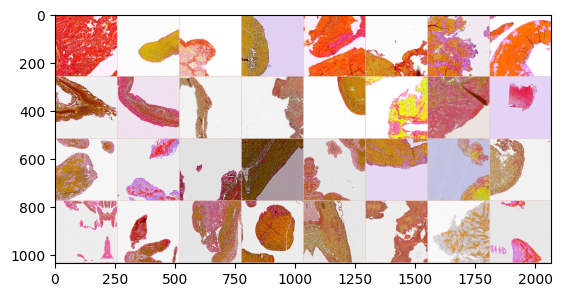

['LAA', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'LAA', 'CE', 'CE', 'LAA', 'LAA', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'LAA', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'LAA']


In [39]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float32
import numpy as np
import torch

# To get one image:
# temp_img, temp_lab = train_dataset[0]
# print(temp_img.shape)
# imshow(temp_img, title=num_labels[temp_lab.item()])
# plt.title(num_labels[temp_lab.item()])

# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["train"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

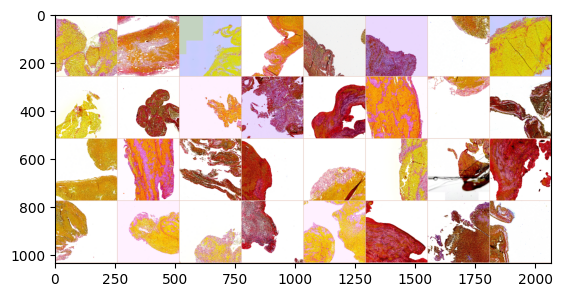

['CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE']


In [40]:
# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["val"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

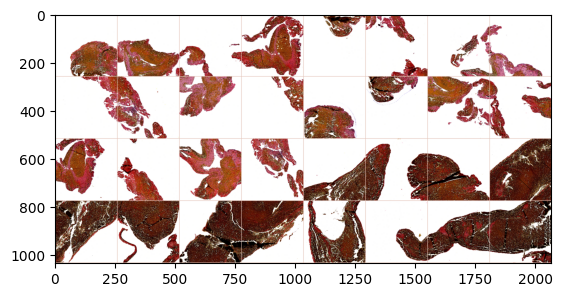

['CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE']


In [41]:
# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["test"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

## Setting up training functions

In [42]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random

cudnn.benchmark = True
plt.ion()   # interactive mode

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

Using device:  cuda:0


In [44]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # # For book-keeping the losses and accuracies
    # epoch_ls = []
    # train_loss_ls = []
    # val_loss_ls = []
    # train_acc_ls = []
    # val_acc_ls = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [45]:
def model_test(model):
  results = {}
  
  model.to(device)
  model.eval()

  correct=0
  total=0
  
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
      inputs = inputs.to(device)
      labels = labels.to(device)
      # print(len(labels))

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      # statistics
      # running_loss += loss.item() * inputs.size(0)
      total += labels.size(0)
      correct += torch.sum(preds == labels.data)
      # print(preds)
      preds_list = [num_labels[x.item()] for x in preds]
      # print(len(preds_list))

      for i in range(len(labels)):
        results[labels[i]] = preds_list[i]

  print(f'Accuracy of the network: {100 * correct // total} %')
  return results

## Try ResNet18, with cleaner patches + more augmentations

In [46]:
model_ft = models.resnet18(weights="DEFAULT")
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


In [47]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.7386 Acc: 0.5142
val Loss: 0.6405 Acc: 0.6764

Epoch 1/9
----------
train Loss: 0.6885 Acc: 0.5525
val Loss: 0.6409 Acc: 0.6639

Epoch 2/9
----------
train Loss: 0.6961 Acc: 0.5487
val Loss: 0.6788 Acc: 0.5986

Epoch 3/9
----------
train Loss: 0.7008 Acc: 0.5413
val Loss: 0.6964 Acc: 0.5529

Epoch 4/9
----------
train Loss: 0.6890 Acc: 0.5612
val Loss: 0.7464 Acc: 0.5125

Epoch 5/9
----------
train Loss: 0.6839 Acc: 0.5589
val Loss: 0.6479 Acc: 0.6627

Epoch 6/9
----------
train Loss: 0.6803 Acc: 0.5721
val Loss: 0.7018 Acc: 0.5416

Epoch 7/9
----------
train Loss: 0.6730 Acc: 0.5751
val Loss: 0.6987 Acc: 0.5291

Epoch 8/9
----------
train Loss: 0.6704 Acc: 0.5879
val Loss: 0.6549 Acc: 0.6128

Epoch 9/9
----------
train Loss: 0.6781 Acc: 0.5745
val Loss: 0.6278 Acc: 0.6586

Training complete in 24m 55s
Best val Acc: 0.676366


In [48]:
results = model_test(model_ft)

Accuracy of the network: 62 %


In [95]:
from sklearn.metrics._plot.roc_curve import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# ROC AUC Curve
def auroc(model):
  y_true_list = []
  y_score_list = []
  y_pred_list = []
  
  model.to(device)
  model.eval()

  correct=0
  total=0
  
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
      inputs = inputs.to(device)
      labels = labels.to(device)
      # print(len(labels))

      outputs = model(inputs)
      # print("OUTPUTS: ", outputs)
      y_score = outputs[:,1]
      y_true = labels.data


      _, preds = torch.max(outputs, 1)
      y_pred = preds
      # print(_)
      # print(y_true)

      # statistics
      # running_loss += loss.item() * inputs.size(0)
      total += labels.size(0)
      correct += torch.sum(preds == labels.data)
      # print(preds)
      # preds_list = [num_labels[x.item()] for x in preds]
      # preds_list = [x.item() for x in preds]
      # print(len(preds_list))

      # for i in range(len(labels)):
      #   results[labels[i]] = preds_list[i]
      y_score = y_score.tolist()
      y_true = y_true.tolist()
      y_pred = y_pred.tolist()
      y_score_list.extend(y_score)
      y_true_list.extend(y_true)
      y_pred_list.extend(y_pred)

  print(f'Accuracy of the network: {100 * correct // total} %')
  return y_true_list, y_score_list, y_pred_list

y_true_out, y_score_out, y_pred_out = auroc(model_ft)
# pred_labels = pd.DataFrame.from_dict(results, orient="index", columns=["label"])

Accuracy of the network: 62 %


AUROC Score:  0.5615962857721641


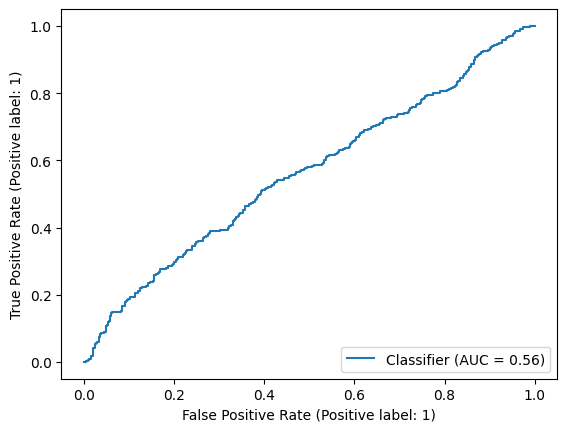

In [96]:
auroc_score = roc_auc_score(y_true_out, y_score_out)
print("AUROC Score: ", auroc_score)

RocCurveDisplay.from_predictions(y_true_out, y_score_out)
plt.show()

In [97]:
# Save the best model
torch.save(model_ft.state_dict(), save_models_dir+'best_resnet18_augment_auroc1.pt')

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus

## Try ResNet18, with cleaner patches + more augmentations

In [ ]:
model_ft = models.resnet18(weights="DEFAULT")
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6960 Acc: 0.5674
val Loss: 0.6365 Acc: 0.6609

Epoch 1/9
----------
train Loss: 0.6657 Acc: 0.6111
val Loss: 0.6788 Acc: 0.6853

Epoch 2/9
----------
train Loss: 0.6360 Acc: 0.6418
val Loss: 0.7116 Acc: 0.6793

Epoch 3/9
----------
train Loss: 0.6321 Acc: 0.6439
val Loss: 0.6957 Acc: 0.6176

Epoch 4/9
----------
train Loss: 0.6217 Acc: 0.6486
val Loss: 0.7581 Acc: 0.5511

Epoch 5/9
----------
train Loss: 0.5982 Acc: 0.6702
val Loss: 0.6325 Acc: 0.6609

Epoch 6/9
----------
train Loss: 0.6059 Acc: 0.6604
val Loss: 0.6413 Acc: 0.6235

Epoch 7/9
----------
train Loss: 0.5843 Acc: 0.6709
val Loss: 0.7643 Acc: 0.6366

Epoch 8/9
----------
train Loss: 0.5798 Acc: 0.6905
val Loss: 0.6892 Acc: 0.6146

Epoch 9/9
----------
train Loss: 0.5664 Acc: 0.7006
val Loss: 0.7537 Acc: 0.5938

Training complete in 14m 28s
Best val Acc: 0.685273


In [ ]:
results = model_test(model_ft)

Accuracy of the network: 64 %


In [ ]:
# Save the best model
torch.save(model_ft.state_dict(), save_models_dir+'best_resnet18_augment.pt')

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus

## Try VGG16_BN, with cleaner + grayscale patches

In [ ]:
model_ft = models.vgg16_bn(weights="DEFAULT")

num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:03<00:00, 176MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6547 Acc: 0.6119
val Loss: 0.6690 Acc: 0.6039

Epoch 1/9
----------
train Loss: 0.5964 Acc: 0.6792
val Loss: 0.6476 Acc: 0.6542

Epoch 2/9
----------
train Loss: 0.5695 Acc: 0.7042
val Loss: 0.9845 Acc: 0.4787

Epoch 3/9
----------
train Loss: 0.5327 Acc: 0.7301
val Loss: 0.8570 Acc: 0.7095

Epoch 4/9
----------
train Loss: 0.5050 Acc: 0.7536
val Loss: 1.0817 Acc: 0.4055

Epoch 5/9
----------
train Loss: 0.4751 Acc: 0.7749
val Loss: 1.0076 Acc: 0.5733

Epoch 6/9
----------
train Loss: 0.4537 Acc: 0.7880
val Loss: 0.8615 Acc: 0.5903

Epoch 7/9
----------
train Loss: 0.4341 Acc: 0.7984
val Loss: 0.9031 Acc: 0.6218

Epoch 8/9
----------
train Loss: 0.4274 Acc: 0.8015
val Loss: 1.0030 Acc: 0.5511

Epoch 9/9
----------
train Loss: 0.4100 Acc: 0.8171
val Loss: 0.9242 Acc: 0.5690

Training complete in 22m 58s
Best val Acc: 0.709540


In [ ]:
results = model_test(model_ft)

Accuracy of the network: 55 %


In [ ]:
# Save the best model
torch.save(model_ft.state_dict(), save_models_dir+'best_vgg16_cleanpatch.pt')

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus

## Try ResNet18, with cleaner patches

In [ ]:
model_ft = models.resnet18(weights="DEFAULT")
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 0.6281 Acc: 0.6452
val Loss: 0.7413 Acc: 0.6695

Epoch 1/4
----------
train Loss: 0.5692 Acc: 0.7053
val Loss: 1.1149 Acc: 0.4574

Epoch 2/4
----------
train Loss: 0.5394 Acc: 0.7299
val Loss: 0.7420 Acc: 0.6184

Epoch 3/4
----------
train Loss: 0.4904 Acc: 0.7595
val Loss: 0.6641 Acc: 0.7240

Epoch 4/4
----------
train Loss: 0.4665 Acc: 0.7747
val Loss: 0.7727 Acc: 0.6261

Training complete in 3m 24s
Best val Acc: 0.724020


In [ ]:
results = model_test(model_ft)

Accuracy of the network: 63 %


In [ ]:
# Save the best model
torch.save(model_ft.state_dict(), save_models_dir+'best_resnet18_cleanpatch.pt')

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus

## Try ResNet18, with top 16 darkest patches

In [ ]:
model_ft = models.resnet18(weights="DEFAULT")
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 308MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 0.6612 Acc: 0.6121
val Loss: 0.6960 Acc: 0.5699

Epoch 1/4
----------
train Loss: 0.6011 Acc: 0.6754
val Loss: 0.6512 Acc: 0.6721

Epoch 2/4
----------
train Loss: 0.5700 Acc: 0.6896
val Loss: 0.7439 Acc: 0.6281

Epoch 3/4
----------
train Loss: 0.5264 Acc: 0.7324
val Loss: 0.8220 Acc: 0.6138

Epoch 4/4
----------
train Loss: 0.4964 Acc: 0.7530
val Loss: 0.9008 Acc: 0.5524

Training complete in 3m 28s
Best val Acc: 0.672057


In [ ]:
results = model_test(model_ft)

Accuracy of the network: 63 %


In [ ]:
# Save the best model
torch.save(model_ft.state_dict(), save_models_dir+'best_resnet18.pt')

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus

## Try ResNet18

In [ ]:
model_ft = models.resnet18(weights="DEFAULT")
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 211MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 0.6303 Acc: 0.6433
val Loss: 0.6975 Acc: 0.6276

Epoch 1/4
----------
train Loss: 0.5820 Acc: 0.6864
val Loss: 0.7438 Acc: 0.6143

Epoch 2/4
----------
train Loss: 0.5578 Acc: 0.7054
val Loss: 0.7001 Acc: 0.6430

Epoch 3/4
----------
train Loss: 0.5149 Acc: 0.7357
val Loss: 0.9002 Acc: 0.5645

Epoch 4/4
----------
train Loss: 0.5018 Acc: 0.7488
val Loss: 0.6766 Acc: 0.6788

Training complete in 6m 36s
Best val Acc: 0.678840


In [ ]:
results = model_test(model_ft)

Accuracy of the network: 66 %


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

save_models_dir = "/content/drive/MyDrive/XGD Final Convolution/"

In [ ]:
# Save the best model
torch.save(model_ft.state_dict(), save_models_dir+'best_resnet18.pt')

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus